<a href="https://colab.research.google.com/github/psykeefuego/DS---ML/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

6/6/24
# Model Aggregation on MNIST digit dataset

* down-sampling
* up-sampling

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sb
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline

 Images are converted into 1-dimensional arrays : `flattening`


 n-dimensions -> 1-dimension (tensor)

In [ ]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data() # X = hand-written image , y = corresponding digit label
# every image is of size: 28 x 28

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train),len(X_test)

(60000, 10000)

In [ ]:
print(X_train[17])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  11 203 229  32   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  26  47  47
   30  95 254 215  13   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  45 154 185 185 223 253 253
  133 175 255 188  19   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 110 253 253 253 24

In [ ]:
print(X_train[17].shape)

(28, 28)


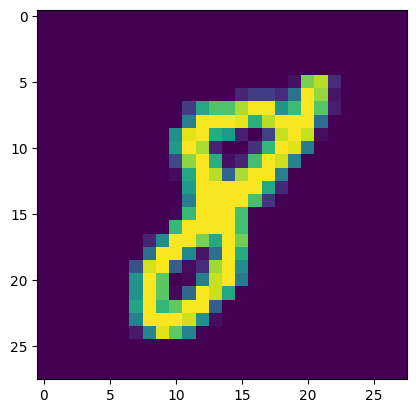

In [ ]:
plt.imshow(X_train[17]);

In [ ]:
y_train[17]

8

In [ ]:
# scaling the data
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[17]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Model Selection

In [ ]:
# create a simple model with an input and output layer and no hidden layers
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(10, activation='sigmoid')
                          ])

# compile the model with different parameters
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model with features and associated labels
model.fit(X_train,y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4727 - accuracy: 0.8749
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3043 - accuracy: 0.9148
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2835 - accuracy: 0.9210
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9238
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2671 - accuracy: 0.9254
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2616 - accuracy: 0.9276
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2583 - accuracy: 0.9290
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2551 - accuracy: 0.9296
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2531 - accuracy: 0.9301
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.251

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2700 - accuracy: 0.9257


[0.2700357139110565, 0.9257000088691711]

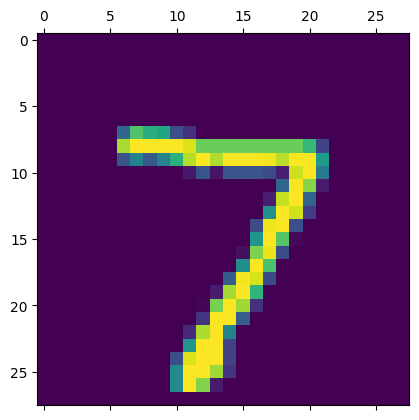

In [ ]:
plt.matshow(X_test[0]);

In [ ]:
# predicted labels
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred[0]

array([1.0661565e-03, 1.7560042e-09, 4.4964543e-03, 9.6396703e-01,
       1.0073391e-03, 1.9628233e-01, 1.7678773e-09, 9.9990183e-01,
       4.5011781e-02, 6.4118212e-01], dtype=float32)

In [ ]:
np.argmax(y_pred[0])

7

# Adding a hidden layer

In [ ]:
# create a simple model with an input and output layer and no hidden layers
hidden = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='sigmoid'),
                           keras.layers.Dense(10, activation='sigmoid')
                          ])

# compile the model with different parameters
hidden.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model with features and associated labels
hidden.fit(X_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4930 - accuracy: 0.8838
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2341 - accuracy: 0.9341
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1860 - accuracy: 0.9477
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1566 - accuracy: 0.9553
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1360 - accuracy: 0.9612


In [ ]:
hidden.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1404 - accuracy: 0.9595


[0.14036014676094055, 0.9595000147819519]

----

# Machine Learning Implementation

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
X = digits.data
y = digits.target

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.svm import SVC

In [ ]:
ml_model = SVC(kernel='rbf')

In [ ]:
ml_model.fit(X_train,y_train)

SVC()

In [ ]:
y_pred = ml_model.predict(X_test)

In [ ]:
from sklearn.metrics import  accuracy_score,classification_report,confusion_matrix

In [ ]:
accuracy_score(y_test, y_pred)

0.9805555555555555

In [ ]:
confusion_matrix(y_test,y_pred)

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  2,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 25,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 38,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 34]])

In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        37\n           1       1.00      1.00      1.00        41\n           2       1.00      1.00      1.00        31\n           3       0.98      0.94      0.96        47\n           4       1.00      1.00      1.00        36\n           5       0.94      0.97      0.95        31\n           6       1.00      1.00      1.00        37\n           7       1.00      0.96      0.98        26\n           8       0.97      0.97      0.97        39\n           9       0.92      0.97      0.94        35\n\n    accuracy                           0.98       360\n   macro avg       0.98      0.98      0.98       360\nweighted avg       0.98      0.98      0.98       360\n'

---